In [34]:
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(f'X train type and shape: {type(X_train)}, {X_train.shape}')
print(f'y train type and shape: {type(y_train)}, {y_train.shape}')
print(f'X test type and shape: {type(X_test)}, {X_test.shape}')
print(f'y test type and shape: {type(y_test)}, {y_test.shape}')

X train type and shape: <class 'numpy.ndarray'>, (60000, 28, 28)
y train type and shape: <class 'numpy.ndarray'>, (60000,)
X test type and shape: <class 'numpy.ndarray'>, (10000, 28, 28)
y test type and shape: <class 'numpy.ndarray'>, (10000,)


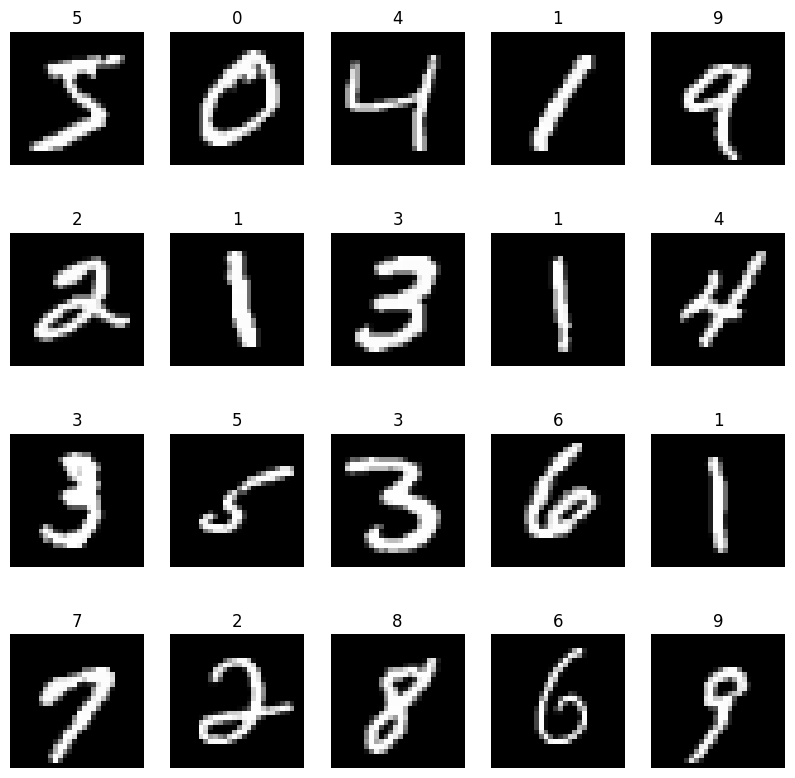

In [20]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
type(y_train[4])

numpy.uint8

In [23]:
train_X = X_train.reshape((X_train.shape[0], 28, 28, 1))
train_X = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [24]:
train_y = to_categorical(y_train)
test_y = to_categorical(y_test)

In [25]:
def load_dataset():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    train_X = X_train.reshape((X_train.shape[0], 28, 28, 1))
    test_X = X_test.reshape((X_test.shape[0], 28, 28, 1))
    train_y = to_categorical(y_train)
    test_y = to_categorical(y_test)
    return train_X, train_y, test_X, test_y

In [26]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    train_norm /= 255
    test_norm /= 255

    return train_norm, test_norm

In [27]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))

    #Compile model
    opt = SGD(learning_rate = 0.01, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [28]:
def evaluate_model(data_X, data_Y, n_folds = 5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle = True, random_state = 1)
    for train_ix, test_ix in kfold.split(data_X):
        model = define_model()
        trainX, trainY, testX, testY = data_X[train_ix], data_Y[train_ix], data_X[test_ix], data_Y[test_ix]

        history = model.fit(trainX, trainY, epochs = 10, batch_size = 32, validation_data = (testX, testY), verbose = 0)

        _, acc = model.evaluate(testX, testY)
        print(f'Accuracy: {acc * 100}')
        scores.append(acc)
        histories.append(history)
    model.save('final_model.h5')
    return scores, histories

In [29]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title("Cross Entropy Loss")
        plt.plot(histories[i].history['loss'], color = 'blue', label = 'train')
        plt.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')

        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
        plt.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
    plt.show()

In [30]:
def summarize_performance(scores):
    print(f'Accuracy: mean = {mean(scores) * 100}, std = {std(scores) * 100}, n = {len(scores)}')
    plt.boxplot(scores)
    plt.show()

In [31]:
def run_test_harness():
    trainX, tainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    scores, histories = evaluate_model(trainX, tainY)
    summarize_diagnostics(histories)
    summarize_performance(scores)
    model.save()

C:\Users\NILADRI\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0642
Accuracy: 98.53333234786987
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0559
Accuracy: 98.60000014305115
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0565
Accuracy: 98.58333468437195
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0399
Accuracy: 98.87499809265137
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9856 - loss: 0.0576


Accuracy: 98.72499704360962


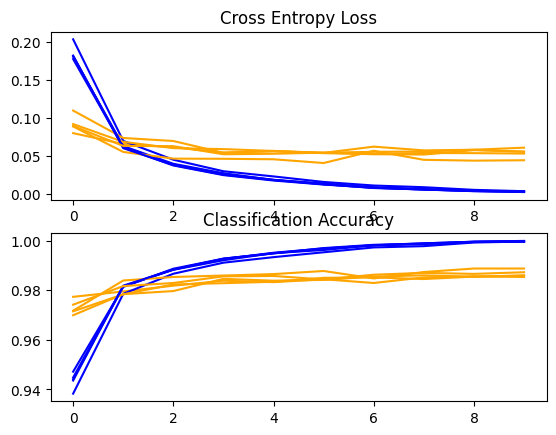

Accuracy: mean = 98.66333246231079, std = 0.12321973587607045, n = 5


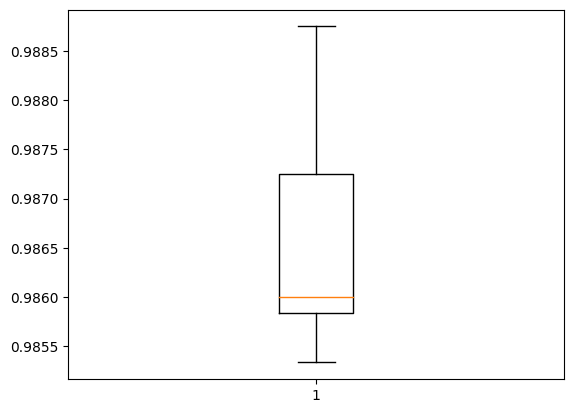

NameError: name 'model' is not defined

In [32]:
run_test_harness()

In [35]:
model = load_model('final_model.h5')
model

<Sequential name=sequential_9, built=True>